I a little bit of trouble installing altair, there's more than just `pip install altair`

`pip install -U altair vega_datasets notebook vega3`

https://vega.github.io/vega/  
http://vallandingham.me/altair_intro.html

Vega-Lite is a high-level grammar of interactive graphics. It provides a JSON syntax for generating visualizations. Vega-Lite specifications can be compiled to Vega specifications.

Vega-Lite specifications describe visualizations as mappings from data to properties of graphical marks. The Vega-Lite compiler produces visualization components including axes, legends, and scales.

In [1]:
import altair as alt
from vega_datasets import data
import pandas as pd
import numpy as np

In [4]:
# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

iris = data.iris()

iris.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


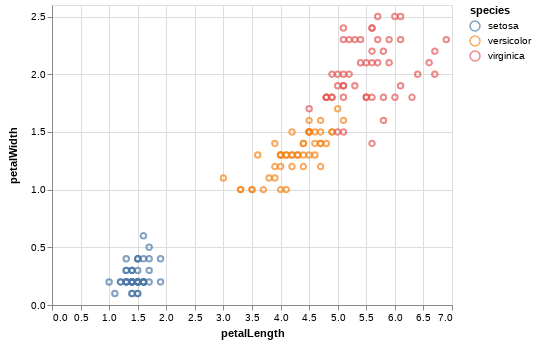

In [5]:
alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

* We create a Chart instance and pass the data that will be visualized  


* Specify what kind of mark to use in the visualization  


* Each mark has a number of possible ‘channels’ to encode data with. We set these in the encoding() method

In [6]:
cars = alt.load_dataset('cars')
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [8]:
alt.Chart(cars).mark_point()

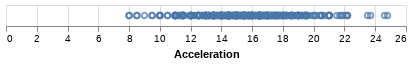

In [9]:
alt.Chart(cars).mark_point().encode(x='Acceleration')

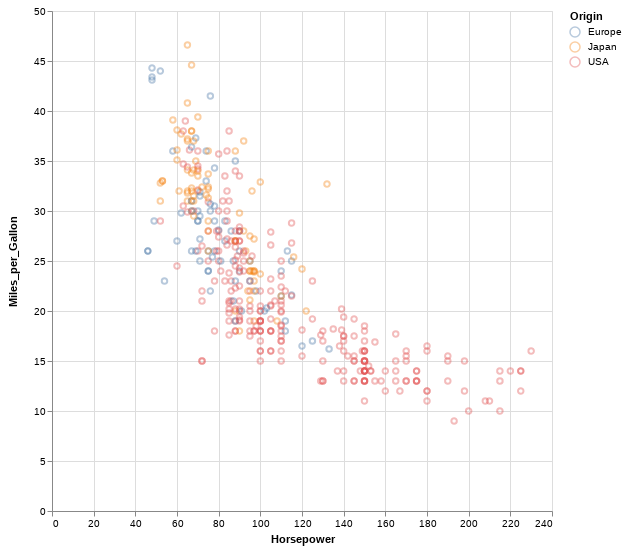

In [10]:
alt.Chart(
    cars,
    width=500,
    height=500).mark_point(opacity=.4).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin'
)

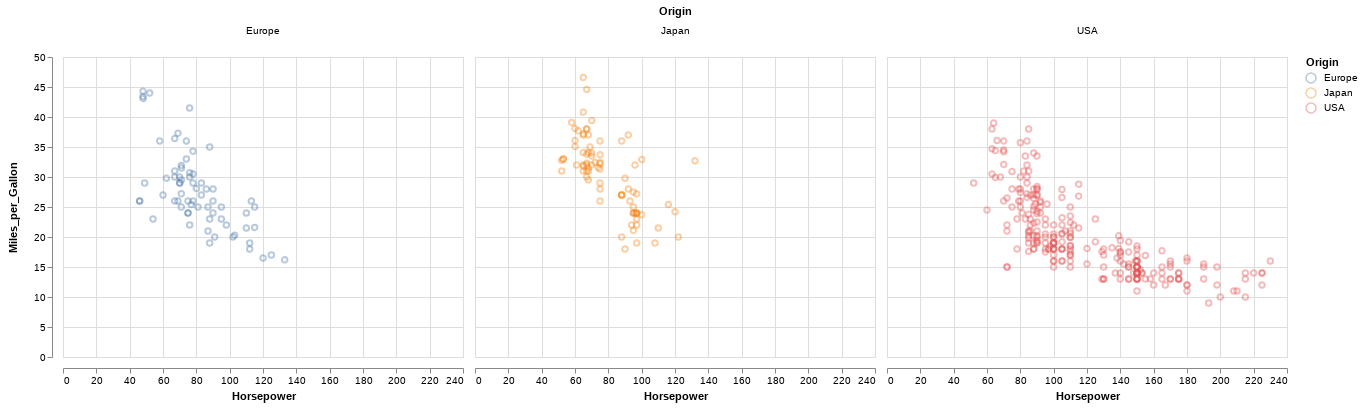

In [11]:
alt.Chart(
    cars
).mark_point(opacity=.4).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin'
).facet(
    column='Origin'
).interactive()

## Selections

* Interactions using selections

* Map user input into data queries, and to drive conditional encoding rules

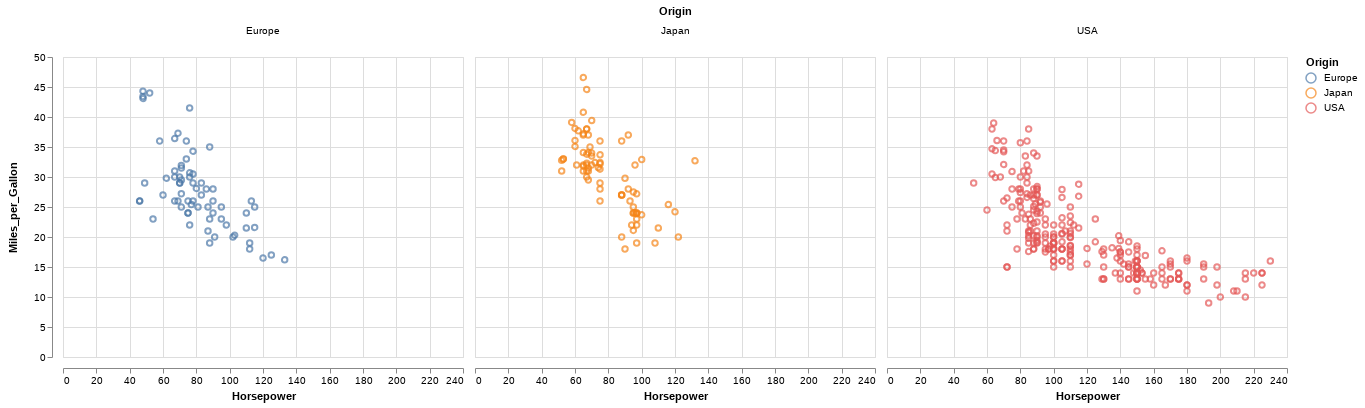

In [13]:
brush = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.value('lightgray')),
).properties(
    selection=brush
).facet(column='Origin:N')

In [14]:
pointer = alt.selection_single(on='mouseover', nearest=True, empty='none')

base = alt.Chart().encode(
    x='Miles_per_Gallon', y='Horsepower'
)

chart = alt.layer(
    base.mark_point().properties(selection=pointer).encode(color='Origin'),
    base.mark_text(dx=8, dy=3, align='left').encode(text=alt.condition(pointer, 'Name', alt.value(''))),
    data=cars
).interactive()

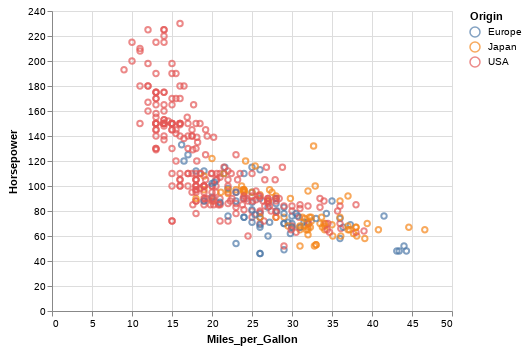

In [15]:
chart

https://jakevdp.github.io/pdvega/

## Heatmap



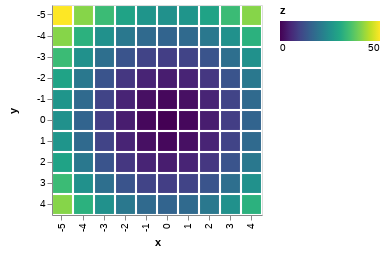

In [70]:
x, y = np.meshgrid(range(-5, 5), range(-5, 5))
z = x ** 2 + y ** 2

# Convert this grid to columnar data expected by Altair
data = pd.DataFrame({'x': x.ravel(),
                     'y': y.ravel(),
                     'z': z.ravel()})

alt.Chart(data).mark_rect().encode(
    x='x:O',
    y='y:O',
    color='z:Q'
)

## Timeseries

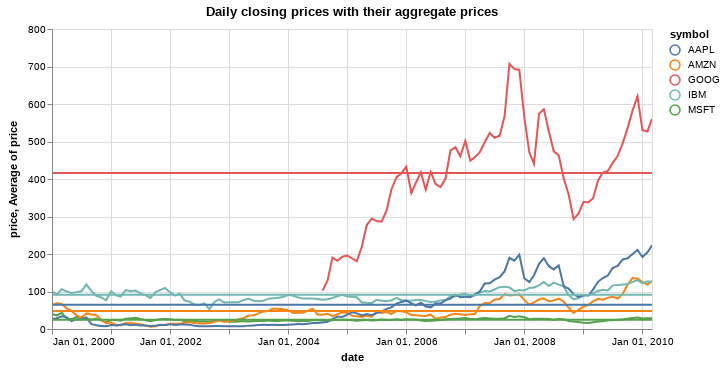

In [74]:
stocks = data.stocks()

line = alt.Chart(stocks).mark_line().encode(
    x='date',
    y='price',
    color='symbol'
).properties(
    width=600,
    title="Daily closing prices with their aggregate prices"
).interactive(bind_y=False)

rule = alt.Chart(stocks).mark_rule().encode(
    alt.Y('average(price)'),
    color='symbol',
    size=alt.value(2)
)

line + rule

## Exploration

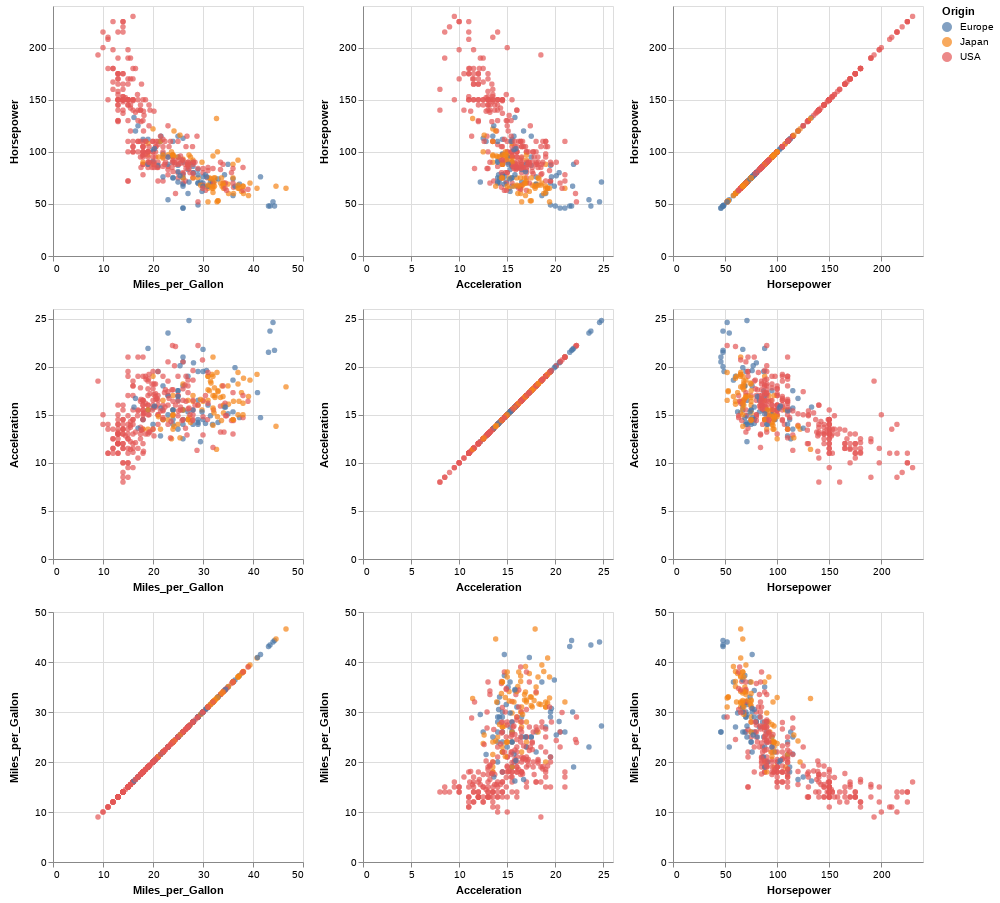

In [78]:
alt.Chart(data.cars.url).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Origin:N'
).properties(
    width=250,
    height=250
).repeat(
    row=['Horsepower', 'Acceleration', 'Miles_per_Gallon'],
    column=['Miles_per_Gallon', 'Acceleration', 'Horsepower']
).interactive()